# **Matriz Insumo - Producto (MIP)**

Una MIP es una herramienta que los economistas usan para entender cómo se relacionan los diferentes sectores de una economía entre sí. En este sentido, muestra cuánto le compra cada sector a los demás y cuánto vende. Sirve para:



*   Analizar el impacto de un sector sobre otros.
*   Medir cuánto aporta cada industria a la economía.
*   Estudiar los efectos de políticas públicas o cambios económicos (por ejemplo, ¿qué pasa con toda la economía si suben los precios del petróleo)  
*   Entre otros.


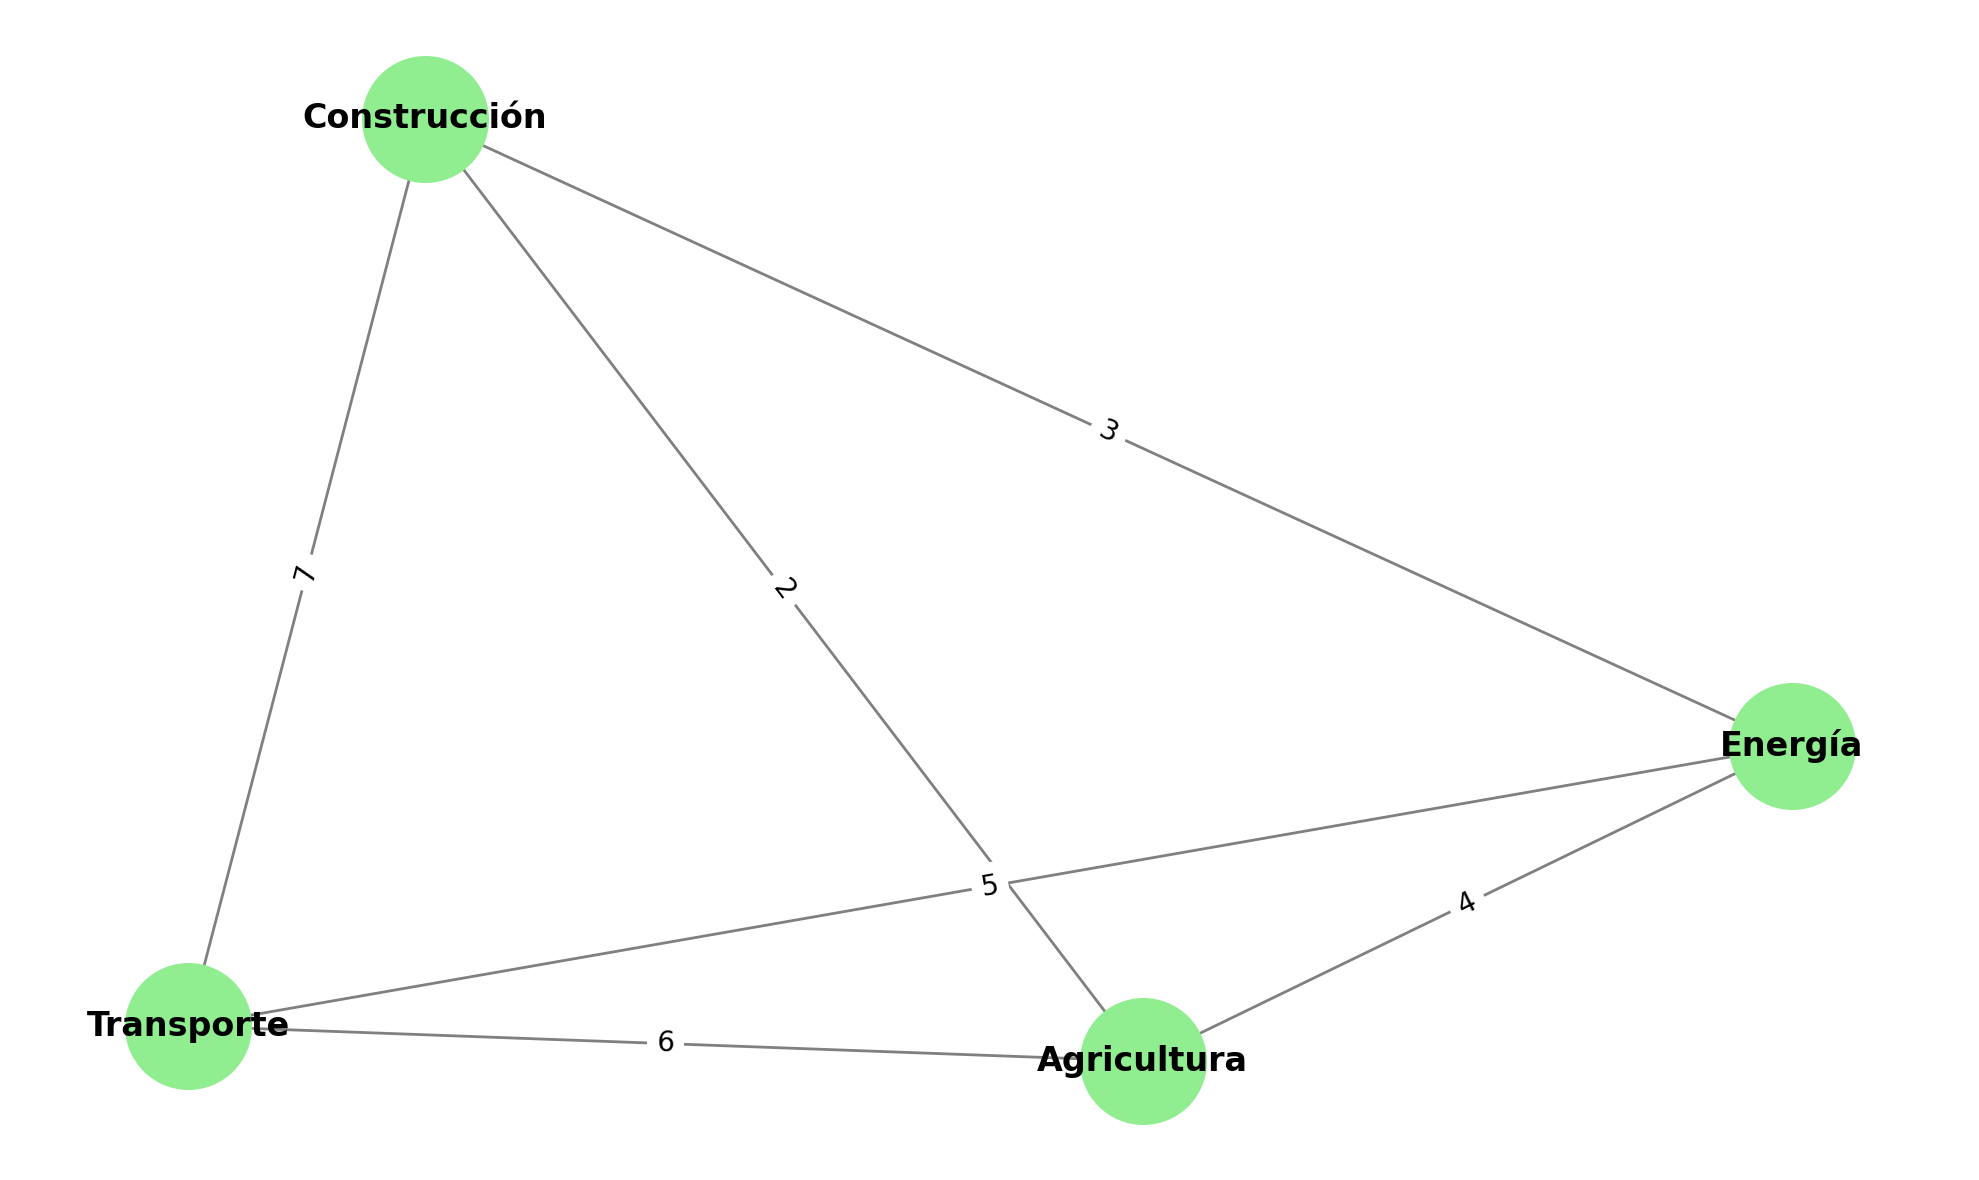

In [ ]:
# Cargar paquete

install.packages("pacman")
library(pacman)

In [ ]:
pacman::p_load(dplyr, ggplot2, tidyr, readxl, plotly, tidyverse, ioanalysis, openxlsx)

In [ ]:
# Cargar Matriz Insumo - Producto 2015

raw=read.xlsx("Insumo-Producto_NS.xlsx",)
raw1=read.csv("Insumo-Producto_NS.csv",stringsAsFactors = F,sep=";")

In [ ]:
# Construcción de matriz

raw=raw1
raw1=as.matrix(raw1,ncol=61)
View(raw1)

Z <- matrix(as.numeric(raw1[2:55, 3:56]), ncol = 54)
f <- matrix(as.numeric(raw1[2:55, c(57:59)]), nrow = dim(Z)[1])
E <- matrix(as.numeric(raw1[2:55, c(60)]), nrow = 54)
X <- matrix(as.numeric(raw1[2:55, 61]), ncol = 1)
V <- matrix(as.numeric(raw1[56:58, 3:56]), ncol = 54)
M <- as.numeric(raw1[59, 3:56])
fV <- matrix(as.numeric(raw1[58:59, c(57:59)]), nrow = 2)

In [ ]:
toy.IO2 <- as.inputoutput(Z = Z, RS_label = raw1[2:55, 1:2],
                          f = f, f_label = raw1[1, c(57:59)],
                          E = E, E_label = raw1[1, c( 60)],
                          X = X,
                          V = V, V_label = raw1[56:58, 1],
                          M = M, M_label = raw1[60,1],
                          fV = fV, fV_label = raw1[59:60, 1])

In [ ]:
### Linkages

# Encadenamientos
link1 <- linkages(toy.IO2, normalize=TRUE) # encadenamientos normalizados
link1


Nota: Los encadenamientos cuyos valores son mayores a 1, cuentan con mayores
conexión.

In [ ]:
RS_label = toy.IO2$RS_label
obj = toy.IO2$L
heatmap.io(obj, RS_label, FUN = log, max = 3)